In [2]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import io,color,data,filters,exposure,util

# image blure

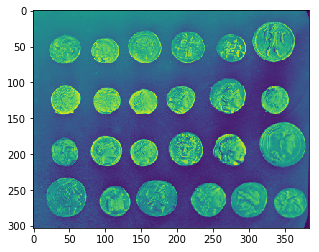

In [3]:
im=data.coins()
plt.imshow(im)

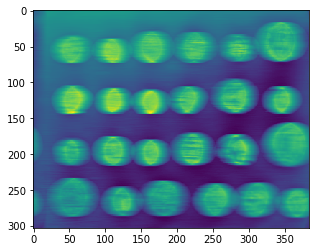

In [4]:
imf=np.fft.fft2(im)
kernel=np.ones((1,20))
kernel=kernel/np.sum(kernel)
kf=np.fft.fft2(kernel,(im.shape[0],im.shape[1]))
g=imf*kf
im_g=np.uint8(np.abs(np.fft.ifft2(g)))
plt.imshow(im_g)

# inverse filter

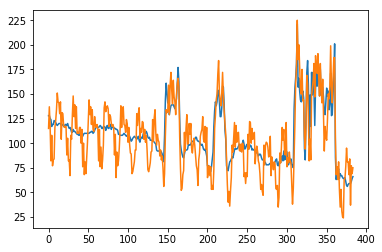

In [19]:
h=np.fft.fft2(im_g)/(0.01+kf)
im_i=np.uint8(np.abs(np.fft.ifft2(h)))
#im_i[30:35,:]=255
#plt.imshow(im_i)
plt.plot(im[30,:])
plt.plot(im_i[30,:])

# wiener filter

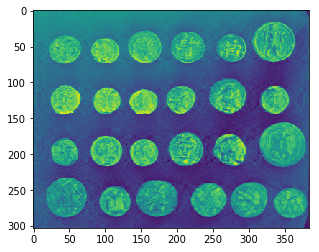

In [30]:
h=np.fft.fft2(im_g)*np.conj(kf)/(0.001+np.abs(kf)**2)
im_w=np.uint8(np.abs(np.fft.ifft2(h)))
plt.imshow(im_w)

# image blure with noise

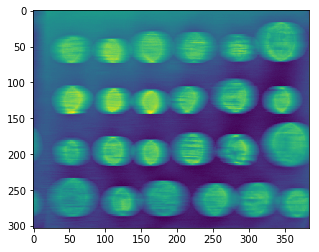

In [27]:
im_gn=np.uint8(util.noise.random_noise(im_g,var=0.00001)*255)
plt.imshow(im_gn)
#plt.plot(im_g[100,100:150])
#plt.plot(im_gn[100,100:150])

# inverse filter with noise

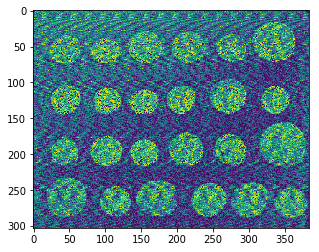

In [9]:

h=np.fft.fft2(im_gn)/(0.01+kf)
plt.imshow(np.uint8(np.abs(np.fft.ifft2(h))))

# wiener filter with noise

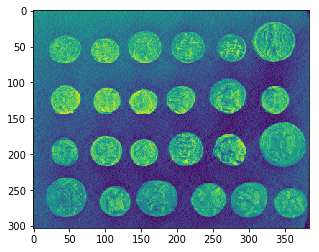

In [31]:
h=np.fft.fft2(im_gn)*np.conj(kf)/(0.001+np.abs(kf)**2)
im_wgn=np.uint8(np.abs(np.fft.ifft2(h)))
plt.imshow(im_wgn)

# geometry_transform

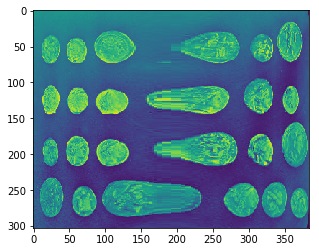

In [37]:
im=data.coins()
imtf=np.zeros(im.shape,dtype=np.uint8)
x,y=im.shape
s=y/2
for i in range(x):
    for j in range(y):
        newj=s+np.sign(j-s)*(np.abs(j-s)/s)**2*s
        if newj>=0 and newj<y:
            imtf[i,j]=im[i,np.int(newj)]
plt.imshow(imtf)

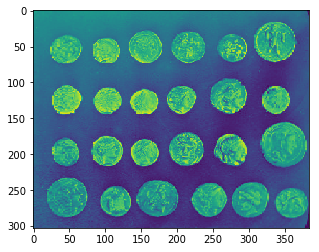

In [38]:
iminv=np.zeros(im.shape,dtype=np.uint8)
for i in range(x):
    for j in range(y):
        newj=s+np.sign(j-s)*np.sqrt(np.abs(j-s)/s)*s
        if newj>=0 and newj<y:
            iminv[i,j]=imtf[i,np.int(newj)]
plt.imshow(iminv)